# Time Series Prediction on interpolated data - InstaCart Dataset

## What is Time series and what are interpolated and extrapolated data, also, why this insta cart is fit under interpolated timeseries data

Time series data follows a pattern and dependencies of timestamp between the data.
Interpolated data is predicting missing values within the observed time range based on surrounding data points.Extrapolated data Predicting values beyond the observed time range, either into the future(t+1,t+2....) or past(t-1,t-2,.....)


## EDA on Instacart 
#### Order Statistics - User order Patterns wrt Timestamp(Weekly,daily,monthly) studied
#### Product Statistics - Top 10 Products, Aisles and Department based n the counts 

## Data Visulaisation On Instacart

## Model Deployment to predict the order using Random Forest, Logistic Regresion and xGboost
    ###Preprocess, Create target variable based on timestamps
    ### Split and train and Test 

## Model Evaluation  using metrics and Visualising the results

#### Import Pandas for Dataset manipulation

In [2]:
import pandas as pd
#read all the files
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346083 entries, 0 to 3346082
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   order_id   int64 
 1   user_id    int64 
 2   timestamp  object
dtypes: int64(2), object(1)
memory usage: 76.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


#### Display and Describe the data

In [ ]:
#display information the data
orders.info() #33 Lakh plus entries
products.info() # 49 thousand entries
aisles.info() # 134 entries
departments.info() #21 entries


#describe the data
orders.describe().T

#### Advanced EDA (Exploratory Data Analysis) and Visualization:

##### Univariate Analysis

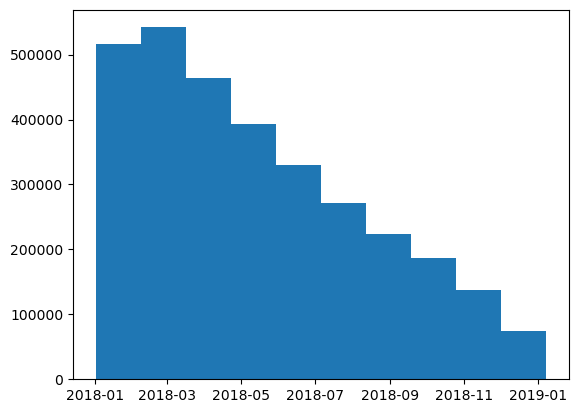

In [41]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.hist(data=orders,x='timestamp')

plt.show()



#### Bivariate Analysis using heatmap - Studying corelation in order table

Correlation Matrix:
              order_id   user_id  time_diff      hour  day_of_week
order_id     1.000000 -0.000073   0.000653 -0.000128     0.000644
user_id     -0.000073  1.000000   0.001470 -0.001299    -0.001160
time_diff    0.000653  0.001470   1.000000  0.017107     0.005233
hour        -0.000128 -0.001299   0.017107  1.000000     0.007479
day_of_week  0.000644 -0.001160   0.005233  0.007479     1.000000

Highly Correlated Pairs (Threshold = 0.80):
No highly correlated pairs found.

Correlation Value Interpretation:
1. Perfect Correlation (1.0): Features move in exact proportion.
2. Strong Positive (> 0.8): Strong direct relationship.
3. Moderate Positive (0.5 - 0.8): Moderate direct relationship.
4. Weak Positive (0.2 - 0.5): Weak direct relationship.
5. No Correlation (0 to ±0.2): Very weak or no relationship.
6. Strong Negative (< -0.8): Strong inverse relationship.


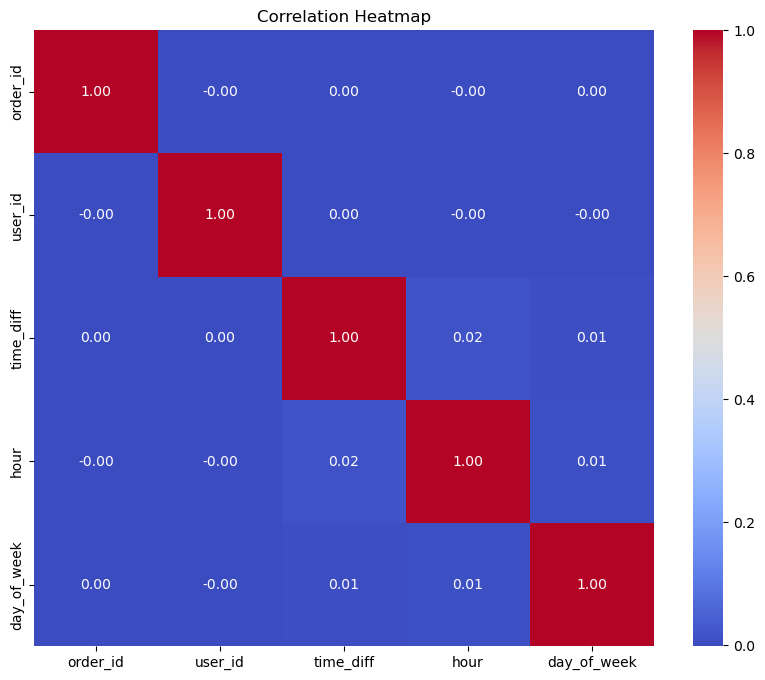

In [46]:

number_cols=orders.select_dtypes(include=['number'])
corr_matrix = number_cols.corr()
# Step 2: Define a threshold for "high correlation"
threshold = 0.8

# Step 3: Identify highly correlated pairs
high_corr = corr_matrix[(corr_matrix >= threshold) & (corr_matrix < 1.0)]

# Step 4: Print results
print("Correlation Matrix:\n", corr_matrix)
print("\nHighly Correlated Pairs (Threshold = {:.2f}):".format(threshold))
high_corr_pairs = high_corr.stack()
if not high_corr_pairs.empty:
    print(high_corr_pairs)
else:
    print("No highly correlated pairs found.")

# Step 5: Explain correlation values
print("\nCorrelation Value Interpretation:")
print("1. Perfect Correlation (1.0): Features move in exact proportion.")
print("2. Strong Positive (> 0.8): Strong direct relationship.")
print("3. Moderate Positive (0.5 - 0.8): Moderate direct relationship.")
print("4. Weak Positive (0.2 - 0.5): Weak direct relationship.")
print("5. No Correlation (0 to ±0.2): Very weak or no relationship.")
print("6. Strong Negative (< -0.8): Strong inverse relationship.")
#Data Visualisation of the above corelation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Descriptive Statistics 

## Timestamp Analysis from order table 

In [ ]:
import pandas as pd

# Load the orders data into a DataFrame
# Assuming the timestamp field is already parsed as datetime
orders = pd.read_csv("orders.csv", parse_dates=["timestamp"])

# Daily Orders
daily_orders = orders.groupby(orders['timestamp'].dt.date)['order_id'].count().reset_index()
daily_orders.columns = ['order_date', 'daily_order_count']
max_daily=daily_orders.max()
print("Maximum order Daily :",max_daily['daily_order_count'])


# Weekly Orders
weekly_orders = orders.groupby(orders['timestamp'].dt.to_period('W'))['order_id'].count().reset_index()
weekly_orders.columns = ['week', 'weekly_order_count']
print("Maximum order Weekly :",weekly_orders['weekly_order_count'])

# Monthly Orders
monthly_orders = orders.groupby(orders['timestamp'].dt.to_period('M'))['order_id'].count().reset_index()
monthly_orders.columns = ['month', 'monthly_order_count']
monthly_orders=monthly_orders['monthly_order_count']

# Orders in the Last 3 Months
three_months_ago = pd.Timestamp.now() - pd.DateOffset(months=3)
last_3_months = orders[orders['timestamp'] >= three_months_ago]
three_month_orders = last_3_months.groupby(last_3_months['timestamp'].dt.to_period('M'))['order_id'].count().reset_index()
three_month_orders.columns = ['month', 'monthly_order_count']

# Print results
print("Daily Orders:\n", daily_orders)
print("Weekly Orders:\n", weekly_orders)
print("Monthly Orders:\n", monthly_orders)
print("Last 3 Months Orders:\n", three_month_orders)


#Maximum orders
#With orders what we can find?
#how many orders received by each user
orders['no_of_orders']=orders.groupby('user_id')['order_id'].count()
print(orders['no_of_orders'])
orders_per_user = orders.groupby('user_id')['order_id'].count()
#avg_orders_per_user = orders_per_user.mean()
#median_orders_per_user = orders_per_user.median()
#maximum orders
max_orders_per_user = orders_per_user.max()
#print(max_orders_per_user)

In [63]:
# Count the number of orders placed by each user
#order_counts = orders['user_id'].value_counts().reset_index(name='order_count')
#order_counts.columns = ['user_id', 'order_count']  # Rename columns to match with orders DataFrame

# Merge the order counts with the original orders DataFrame
#orders_with_count = orders.merge(order_counts, on='user_id', how='left')
#print(f'{'user_id'},{'count'}', order_counts)

# Print the resulting DataFrame
#print(orders_with_count)

# Step 2: Group by product_id and count the number of orders for each product
product_order_counts= orders.groupby('user_id').size().reset_index(name='order_count')
order_count=orders.merge(product_order_counts,on='user_id',how='left')
print(order_count)

         order_id  user_id           timestamp  time_diff  hour  day_of_week  \
0         2398795        1 2018-01-18 07:00:00      359.0     7            3   
1          473747        1 2018-02-08 12:00:00      509.0    12            3   
2         2254736        1 2018-03-09 07:00:00      691.0     7            4   
3          431534        1 2018-04-06 15:00:00      680.0    15            4   
4         3367565        1 2018-04-25 07:00:00      448.0     7            2   
...           ...      ...                 ...        ...   ...          ...   
3139869   2266710   206209 2018-06-08 18:00:00      699.0    18            4   
3139870   1854736   206209 2018-07-08 10:00:00      712.0    10            6   
3139871    626363   206209 2018-07-26 12:00:00      434.0    12            3   
3139872   2977660   206209 2018-08-02 12:00:00      168.0    12            3   
3139873    272231   206209 2018-09-01 14:00:00      722.0    14            5   

         order_count  
0               

## Clustering Orders into  1.frequent, 2.moderate and 3.less frequent buyers (3 month data)

In [ ]:
# Filtering  and Scaling Before Clustering using K-means and DBScan

In [49]:
#Calculating the orders count for 3 months for each user
# the orders for three month is standarised (mean 0 and std 1)
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Filter last 3 months
orders['timestamp'] = pd.to_datetime(orders['timestamp'])
recent_orders = orders[orders['timestamp'] > orders['timestamp'].max() - pd.DateOffset(months=3)]

# Count orders per user
user_activity = recent_orders.groupby('user_id')['order_id'].count().reset_index()
user_activity.columns = ['user_id', 'order_count']

# Scale data
scaler = StandardScaler()
user_activity['order_count_scaled'] = scaler.fit_transform(user_activity[['order_count']])


In [50]:
from sklearn.cluster import KMeans, DBSCAN

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
user_activity['kmeans_labels'] = kmeans.fit_predict(user_activity[['order_count_scaled']])

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
user_activity['dbscan_labels'] = dbscan.fit_predict(user_activity[['order_count_scaled']])


In [ ]:
#Evaluating which has high score

In [ ]:
# Silhouette scores
from sklearn.metrics import silhouette_score


kmeans_silhouette = silhouette_score(user_activity[['order_count_scaled']], user_activity['kmeans_labels'])
dbscan_silhouette = silhouette_score(user_activity[['order_count_scaled']], user_activity['dbscan_labels'])

print("K-Means Silhouette Score:", kmeans_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)


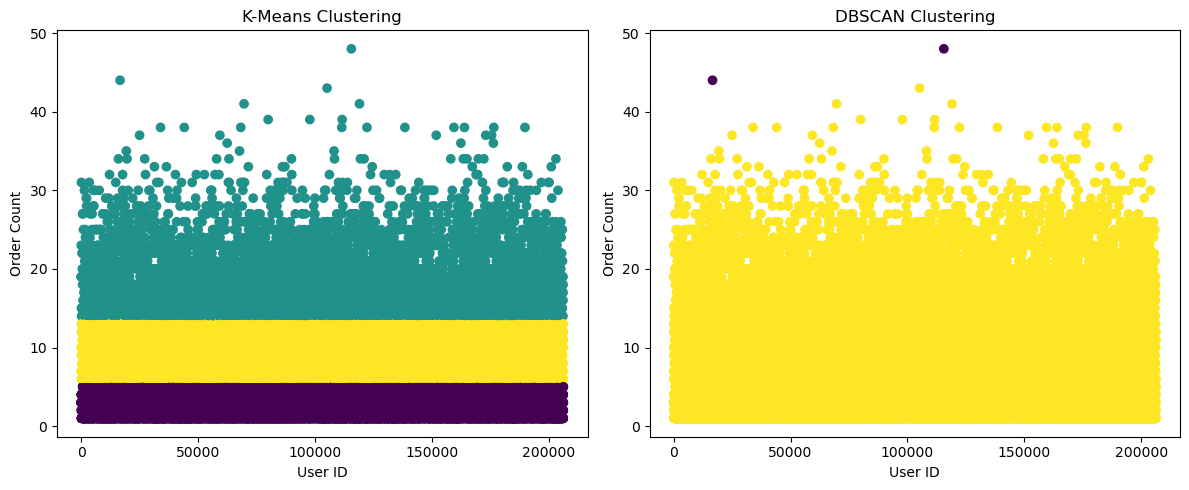

In [51]:
#Visalising K-means and DBSCan
import matplotlib.pyplot as plt

# Plot K-Means Clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(
    user_activity['user_id'], 
    user_activity['order_count'], 
    c=user_activity['kmeans_labels'], 
    cmap='viridis'
)
plt.title("K-Means Clustering")
plt.xlabel("User ID")
plt.ylabel("Order Count")

# Plot DBSCAN Clusters
plt.subplot(1, 2, 2)
plt.scatter(
    user_activity['user_id'], 
    user_activity['order_count'], 
    c=user_activity['dbscan_labels'], 
    cmap='viridis'
)
plt.title("DBSCAN Clustering")
plt.xlabel("User ID")
plt.ylabel("Order Count")

# Show both plots
plt.tight_layout()
plt.show()



## OBSERVATION : 
#### 1.the order frequency of each customer in 3 month is studied..
#### 2. The data is scaled before clustering and found DBscan has high silhouette score but K-means clusters better 

## Product Statistics 

In [52]:
#Step 1
#unque products, aisle and department

total_products=products['product_id'].nunique()
total_products = products['product_id'].nunique()
unique_aisles = products['aisle_id'].nunique()
unique_departments = products['department_id'].nunique()
print('Unique Products=',total_products)
print('Unique Aisles=',unique_aisles)
print('Unique Department',unique_departments)
# Number of unique products per department
department_product_count = products.groupby('department_id')['product_id'].nunique()
print("Departmental Product Diversity:\n", department_product_count.sort_values(ascending=False))





Unique Products= 49688
Unique Aisles= 134
Unique Department 21
Departmental Product Diversity:
 department_id
11    6563
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1115
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: product_id, dtype: int64


Top 10 Aisles:
 aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
107     989
94      894
21      891
38      880
61      874
Name: count, dtype: int64
Top 10 Departments:
 department_id
11    6563
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
Name: count, dtype: int64
Last Top 10 Departments:
 aisle_id
35     82
58     81
15     80
125    69
39     54
113    47
82     44
32     32
68     26
18     12
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Aisles by Product Count'}, xlabel='aisle_id'>

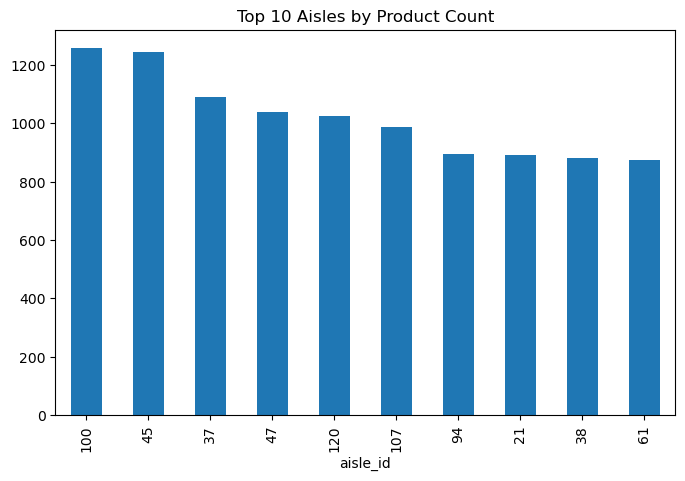

In [53]:
#Step 2
#Most popular(head) and unpoplar(tail) products
# Top 10 aisles by product count
pop_aisles = products['aisle_id'].value_counts().head(10)
unpop_aisles = products['aisle_id'].value_counts().tail(10)                                                     
print("Top 10 Aisles:\n", pop_aisles)

# Top 10 departments by product count
pop_departments = products['department_id'].value_counts().head(10)
unpop_dept = products['aisle_id'].value_counts().tail(10)                                                     
print("Top 10 Departments:\n", pop_departments)
print("Last Top 10 Departments:\n", unpop_dept)

# Visualize top aisles
pop_aisles.plot(kind='bar', title="Top 10 Aisles by Product Count", figsize=(8, 5))


In [54]:
#Step 3: Aisle-Department Relationships


# Group by department and aisle, count products, then select top 10 aisles by product count
top_aisles = products.groupby('aisle_id').size().nlargest(25).index

# Create crosstab for top aisles and all departments
cross_tab = pd.crosstab(products[products['aisle_id'].isin(top_aisles)]['aisle_id'], products['department_id'])

#since 134 x axis of aisles vales display congested we take only 20 values of aisles
# Limit the number of aisles and departments shown (e.g., top 10)





#### Ploting with different chart to visualise and understand


<Figure size 2000x4000 with 0 Axes>

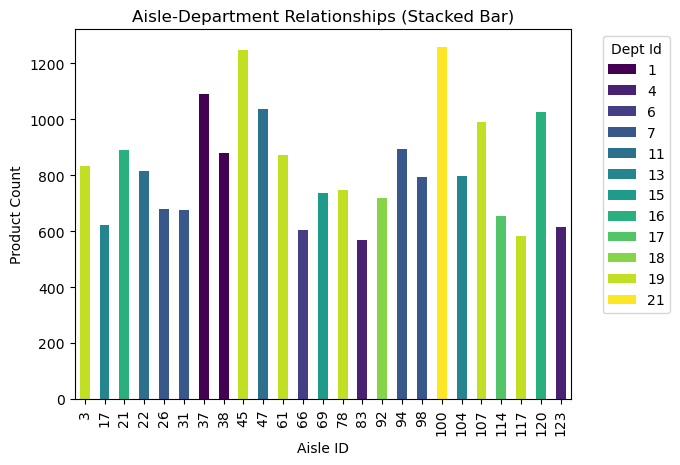

<Figure size 3000x2500 with 0 Axes>

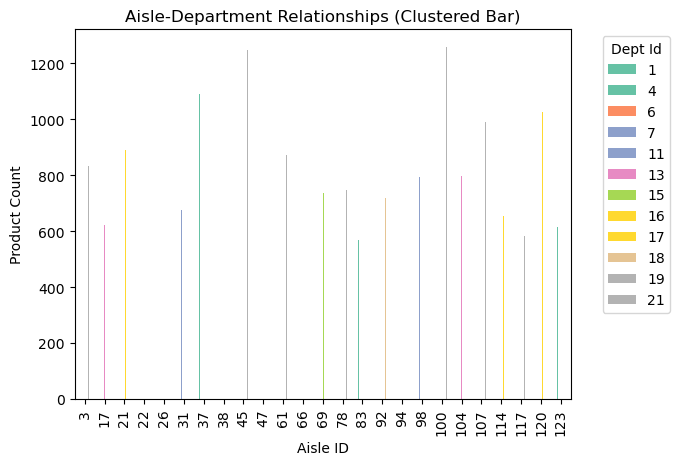

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from collections import Counter
%matplotlib  inline

#from wordcloud import WordCloud

# 1. Stacked Bar Chart
plt.figure(figsize=(20, 40)) 
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Aisle-Department Relationships (Stacked Bar)")
plt.legend(title='Dept Id', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Aisle ID")
plt.xticks(rotation=90)
plt.ylabel("Product Count")
plt.show()

# 2. Clustered Bar Chart
plt.figure(figsize=(30, 25))
cross_tab.plot(kind='bar', colormap='Set2')
plt.title("Aisle-Department Relationships (Clustered Bar)")
plt.legend(title='Dept Id', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Aisle ID")
plt.ylabel("Product Count")
plt.show()



# 4. Treemap using Plotly (Interactive)
fig = px.treemap(products, path=['aisle_id', 'department_id'], title="Aisle-Department Relationships (Treemap)")
fig.show()



## Create Clusters of 21 Departments and the aisles in it

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



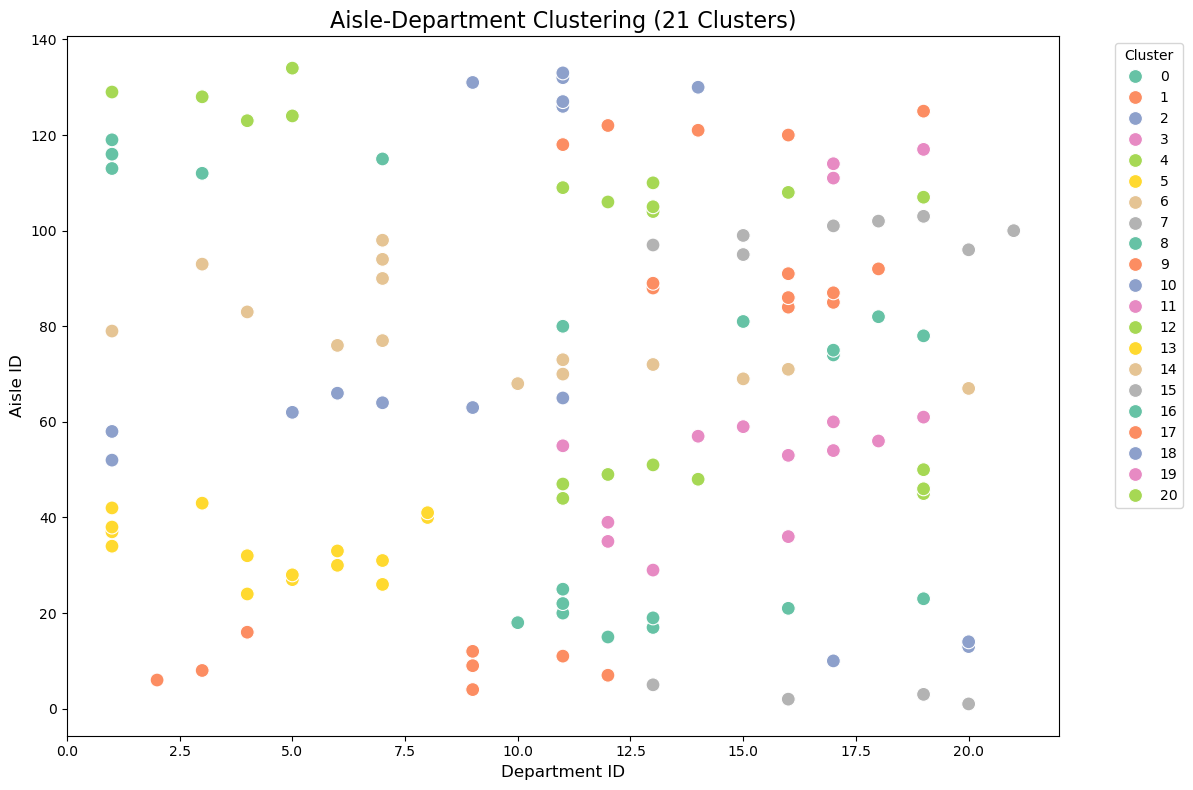

<Figure size 1400x600 with 0 Axes>

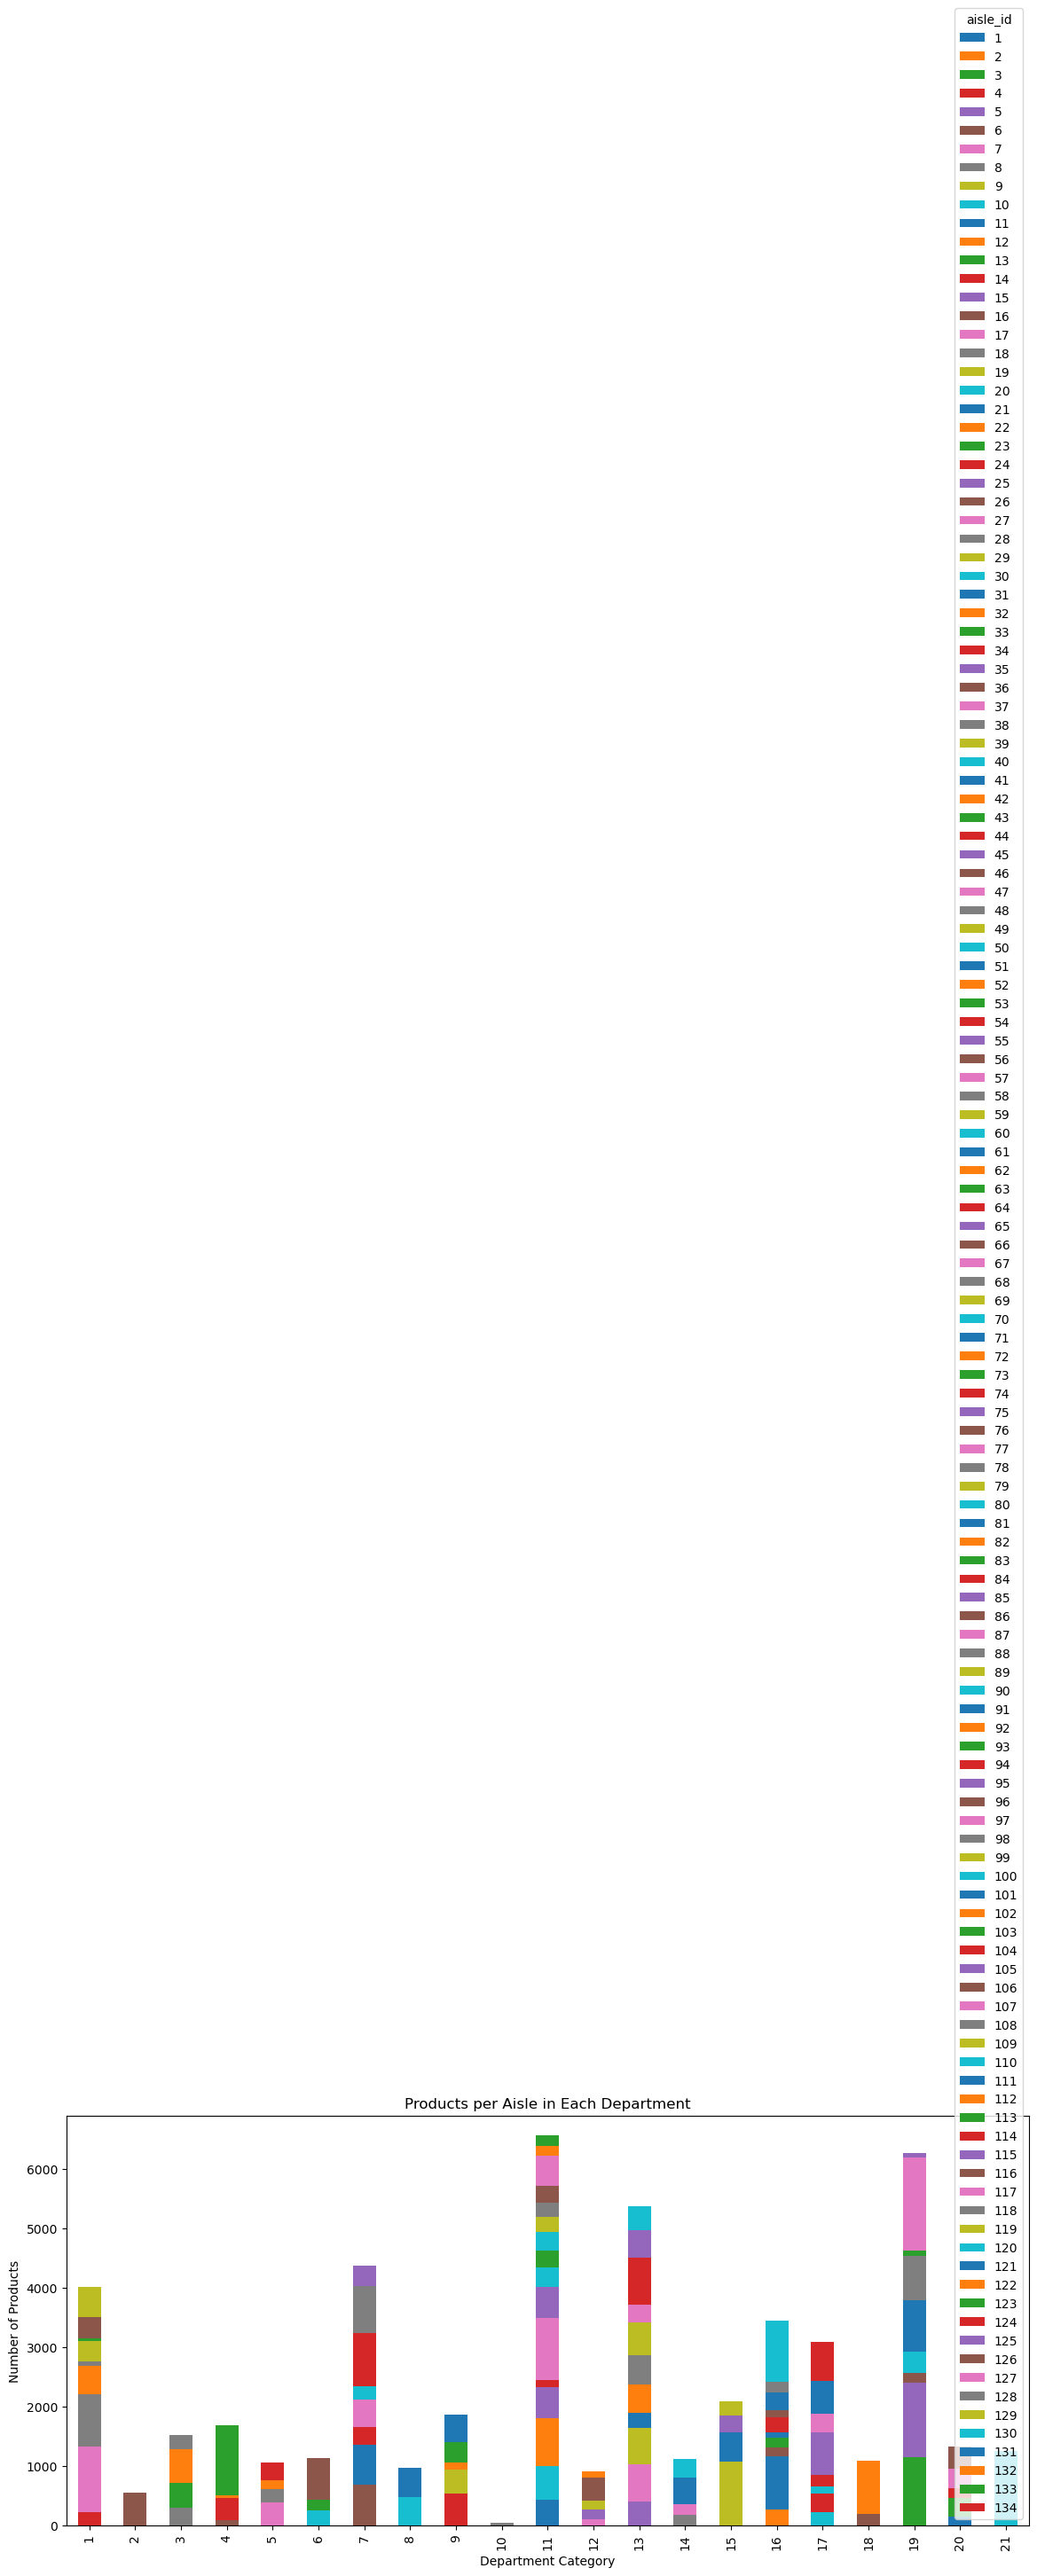

   department_id  aisle_id  product_count  cluster
0              1        34            229       13
1              1        37           1091        5
2              1        38            880        5
3              1        42            189        5
4              1        52            296       10


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
# Step 1: Group by department and aisle, count the number of products
department_aisle = products.groupby(['department_id', 'aisle_id']).size().reset_index(name='product_count')

# Step 2: Create a feature matrix for clustering (department_id and aisle_id as features)
X = department_aisle[['department_id', 'aisle_id']]

# Step 3: Apply K-Means clustering to create 21 clusters
kmeans = KMeans(n_clusters=21, random_state=42)
department_aisle['cluster'] = kmeans.fit_predict(X)

# Step 4: Visualize the clustering result
plt.figure(figsize=(12, 8))
sns.scatterplot(data=department_aisle, x='department_id', y='aisle_id', hue='cluster', palette='Set2', s=100)
plt.title('Aisle-Department Clustering (21 Clusters)', fontsize=16)
plt.xlabel('Department ID', fontsize=12)
plt.ylabel('Aisle ID', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

# Group products by department_id and aisle_id, counting the number of products
product_by_aisle_per_dept = products.groupby(['department_id', 'aisle_id'])['product_id'].count().unstack()

# Plot the bar chart
product_by_aisle_per_dept.plot(kind='bar', stacked=True, figsize=(14, 6), title='Products per Aisle in Each Department')
plt.xlabel('Department Category')
plt.ylabel('Number of Products')

plt.show()

# Optional: Show the first few rows of the clustering result
print(department_aisle.head())

# Identifying the distrubution for skewness and Kurtosis and Transforming on products data

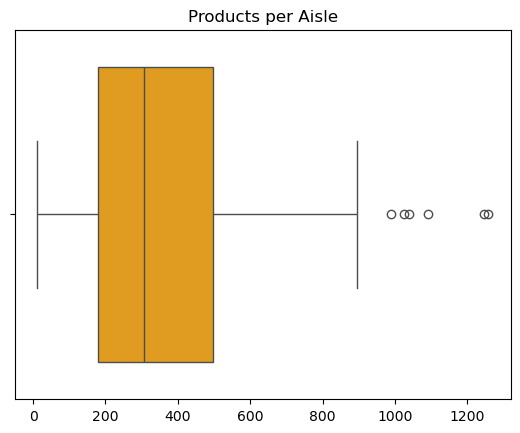

Skewness: 1.20


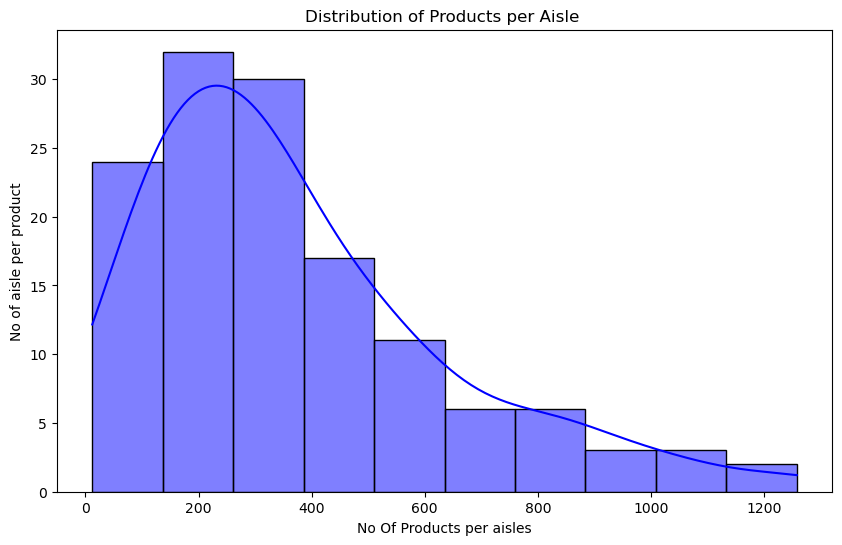

In [61]:
#boxplot for the same products per aisle
sns.boxplot(x=products_per_aisle,color='orange')
plt.xlabel("")
plt.title("Products per Aisle")
plt.show()
# Products per aisle
products_per_aisle = products.groupby('aisle_id')['product_id'].count()

# Summary statistics
#print("Products per Department Distribution:")
#print(products_per_department.describe())

# Skewness
print(f"Skewness: {products_per_aisle.skew():.2f}")

# Visualize
plt.figure(figsize=(10, 6))
sns.histplot(products_per_aisle, kde=True, color='blue', bins=10)
plt.title('Distribution of Products per Aisle ')
plt.xlabel('No Of Products per aisles')
plt.ylabel('No of aisle per product')
plt.show()



In [ ]:
#Data distribution Transfomation on Log, Square and Yeo and finding which performa better - Created a Public Class

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import yeojohnson, skew, kurtosis


class DistributionAnalyzer:
    """
    A class for analyzing and visualizing data distributions with transformations.
    """
    def __init__(self, data):
        """
        Initialize the DistributionAnalyzer with the data to analyze.
        Parameters:
            data (array-like or pandas.Series): The dataset column or array for analysis.
        """
        self.data = np.array(data)  # Ensure the data is a NumPy array for uniformity
        self.results = {}  # Store transformation results (skewness, kurtosis)

    def analyze_distribution(self):
        """
        Visualize the original distribution and compare it with transformations:
        - Log Transformation
        - Square Root Transformation
        - Yeo-Johnson Transformation
        """
        # Transformation functions
        transformations = {
            'Original': lambda x: x,
            'Log Transformation': lambda x: np.log1p(x),  # log(1 + x)
            'Square Root Transformation': lambda x: np.sqrt(x),  # sqrt(x)
            'Yeo-Johnson Transformation': lambda x: yeojohnson(x)[0],  # Handles positive and zero values
        }

        # Number of transformations (including original)
        num_plots = len(transformations)

        # Set up the plot grid
        plt.figure(figsize=(12, 5 * num_plots))
        plt.suptitle("Distribution Analysis", fontsize=16)

        # Loop through transformations and plot
        for i, (name, func) in enumerate(transformations.items(), start=1):
            try:
                # Apply transformation
                transformed_data = func(self.data)

                # Calculate skewness and kurtosis
                data_skewness = skew(transformed_data)
                data_kurtosis = kurtosis(transformed_data)  # Excess kurtosis

                # Store the results
                self.results[name] = {
                    'Skewness': data_skewness,
                    'Kurtosis': data_kurtosis
                }

                # Create subplot for each transformation
                plt.subplot(num_plots, 1, i)
                sns.histplot(transformed_data, kde=True, bins=30, color=np.random.rand(3,))
                plt.title(
                    f"{name}\n(Skewness: {data_skewness:.2f}, Kurtosis: {data_kurtosis:.2f})"
                )
                plt.xlabel("Values")
                plt.ylabel("Frequency")
            except Exception as e:
                # Handle transformation errors (e.g., invalid data for log)
                plt.subplot(num_plots, 1, i)
                plt.text(0.5, 0.5, f"Error applying {name}: {e}",
                         horizontalalignment='center', verticalalignment='center', fontsize=12)
                plt.axis('off')

        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    def find_best_transformation(self):
        """
        Evaluate transformations based on skewness and kurtosis, and determine the best one.
        Returns:
            best_transformation (str): The name of the best transformation.
        """
        print("\nTransformation Performance:\n")
        best_score = float('inf')  # Initialize with a large value
        best_transformation = None

        for name, stats in self.results.items():
            skewness = stats['Skewness']
            kurtosis = stats['Kurtosis']

            # Calculate how close to normal the transformation is (ideal: skew = 0, kurtosis = 0)
            score = abs(skewness) + abs(kurtosis)  # Combined score of skewness and kurtosis

            # Print performance details
            print(f"{name}:\n  Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}, Score: {score:.2f}")

            # Update the best transformation
            if score < best_score:
                best_score = score
                best_transformation = name

        print(f"\nBest Transformation: {best_transformation} (Score: {best_score:.2f})")
        return best_transformation


In [ ]:
# Initialize the analyzer with the data -Class Calling to transform the Distribution for reducing skewedness
analyzer = DistributionAnalyzer(orders_per_user)
# Analyze and visualize
analyzer.analyze_distribution()
# Find the best transformation
best_transformation = analyzer.find_best_transformation()


# Data Modeling using LR, RandomForest and Gradient boosting

# Problem Statement
We want to predict when a user will place their next order based on past orders using timestamps. 
The goal is to test multiple models (Linear Regression, Random Forest, and Gradient Boosting) to identify which performs best. We will evaluate them using Mean Absolute Error (MAE).

In [31]:
#Data Preprocessing before model implementation
import pandas as pd

# Load and preprocess data
orders = pd.read_csv('orders.csv')
orders['timestamp'] = pd.to_datetime(orders['timestamp'])
orders = orders.sort_values(by=['user_id', 'timestamp'])
orders['time_diff'] = orders.groupby('user_id')['timestamp'].diff().dt.total_seconds() / 3600
orders['hour'] = orders['timestamp'].dt.hour
orders['day_of_week'] = orders['timestamp'].dt.dayofweek
orders = orders.dropna()  # Remove missing values


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Features and target
X = orders[['hour', 'day_of_week']]
y = orders['time_diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = mean_absolute_error(y_test, y_pred)

print(results)


{'Linear Regression': 178.12417321296368, 'Random Forest': 177.93394309900233, 'Gradient Boosting': 177.9322471516801}


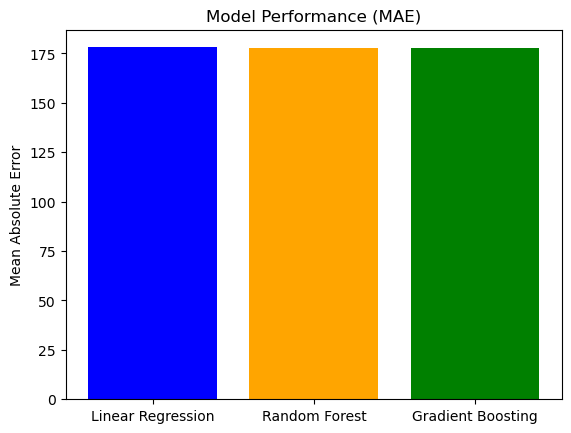

Best model: Gradient Boosting with MAE 177.93


In [33]:
#Result Visulisation on which model performs good
import matplotlib.pyplot as plt

# Plot MAE for each model
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green'])
plt.title("Model Performance (MAE)")
plt.ylabel("Mean Absolute Error")
plt.show()

# Best model
best_model = min(results, key=results.get)
print(f"Best model: {best_model} with MAE {results[best_model]:.2f}")


# Conclusion
The dataset taken followed a time series data with interpolation and the order is prediction using interpolated pattern learning. It is found that XGboost outperforms Random Forest Regression and Logistic Regression. 